In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("Netflix Dataset Latest 2021.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  9425 non-null   object 
 1   Genre                  9400 non-null   object 
 2   Tags                   9389 non-null   object 
 3   Languages              9266 non-null   object 
 4   Series or Movie        9425 non-null   object 
 5   Hidden Gem Score       9415 non-null   float64
 6   Country Availability   9414 non-null   object 
 7   Runtime                9424 non-null   object 
 8   Director               7120 non-null   object 
 9   Writer                 7615 non-null   object 
 10  Actors                 9314 non-null   object 
 11  View Rating            6827 non-null   object 
 12  IMDb Score             9417 non-null   float64
 13  Rotten Tomatoes Score  5445 non-null   float64
 14  Metacritic Score       4082 non-null   float64
 15  Awar

In [11]:
df['Country Availability'] = df["Country Availability"].fillna(df["Country Availability"].mode()[0])
df['first_country'] = df['Country Availability'].apply(lambda x: x.split(",")[0])
df['first_country']

0        Thailand
1          Canada
2        Thailand
3          Poland
4       Lithuania
          ...    
9420      Hungary
9421      Hungary
9422    Australia
9423      Belgium
9424      Belgium
Name: first_country, Length: 9425, dtype: object

In [12]:
df['count']=1 #helper column
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

Text(0.125, 1, 'Top 10 countries on Netflix')

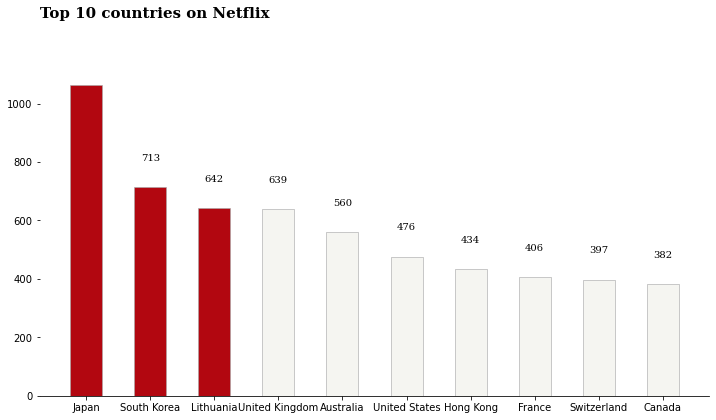

In [18]:
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1]= color_map[2] = '#b20710'
fig,ax = plt.subplots(1,1,figsize=(12,6))

#Annotating the figure
ax.bar(data.index,data,width=0.5,edgecolor='darkgray',linewidth=0.6,color=color_map)
for i in data.index:
    ax.annotate(f"{data[i]}",xy=(i,data[i]+100),va='center',ha='center',fontweight='light',fontfamily='serif')
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

    
#Adding text
fig.text(0.125,1,'Top 10 countries on Netflix',fontsize=15,fontweight='bold',fontfamily='serif')
